In [1]:
%cd /home/naodell/work/hgcal

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl


/home/naodell/work/hgcal


In [59]:
df = pd.read_pickle('data/tc_energies.pkl').drop('index', axis=1)
df = df.query('zside == 1 and mboard_id == 1 and layer == 1 and subdet == 3')
df = df.set_index(['evt', 'mod_id', 'tc_id'])

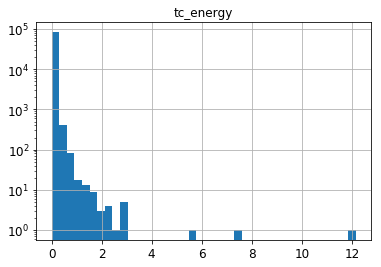

In [81]:
df.hist('tc_energy', bins=40)
plt.yscale('log')
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


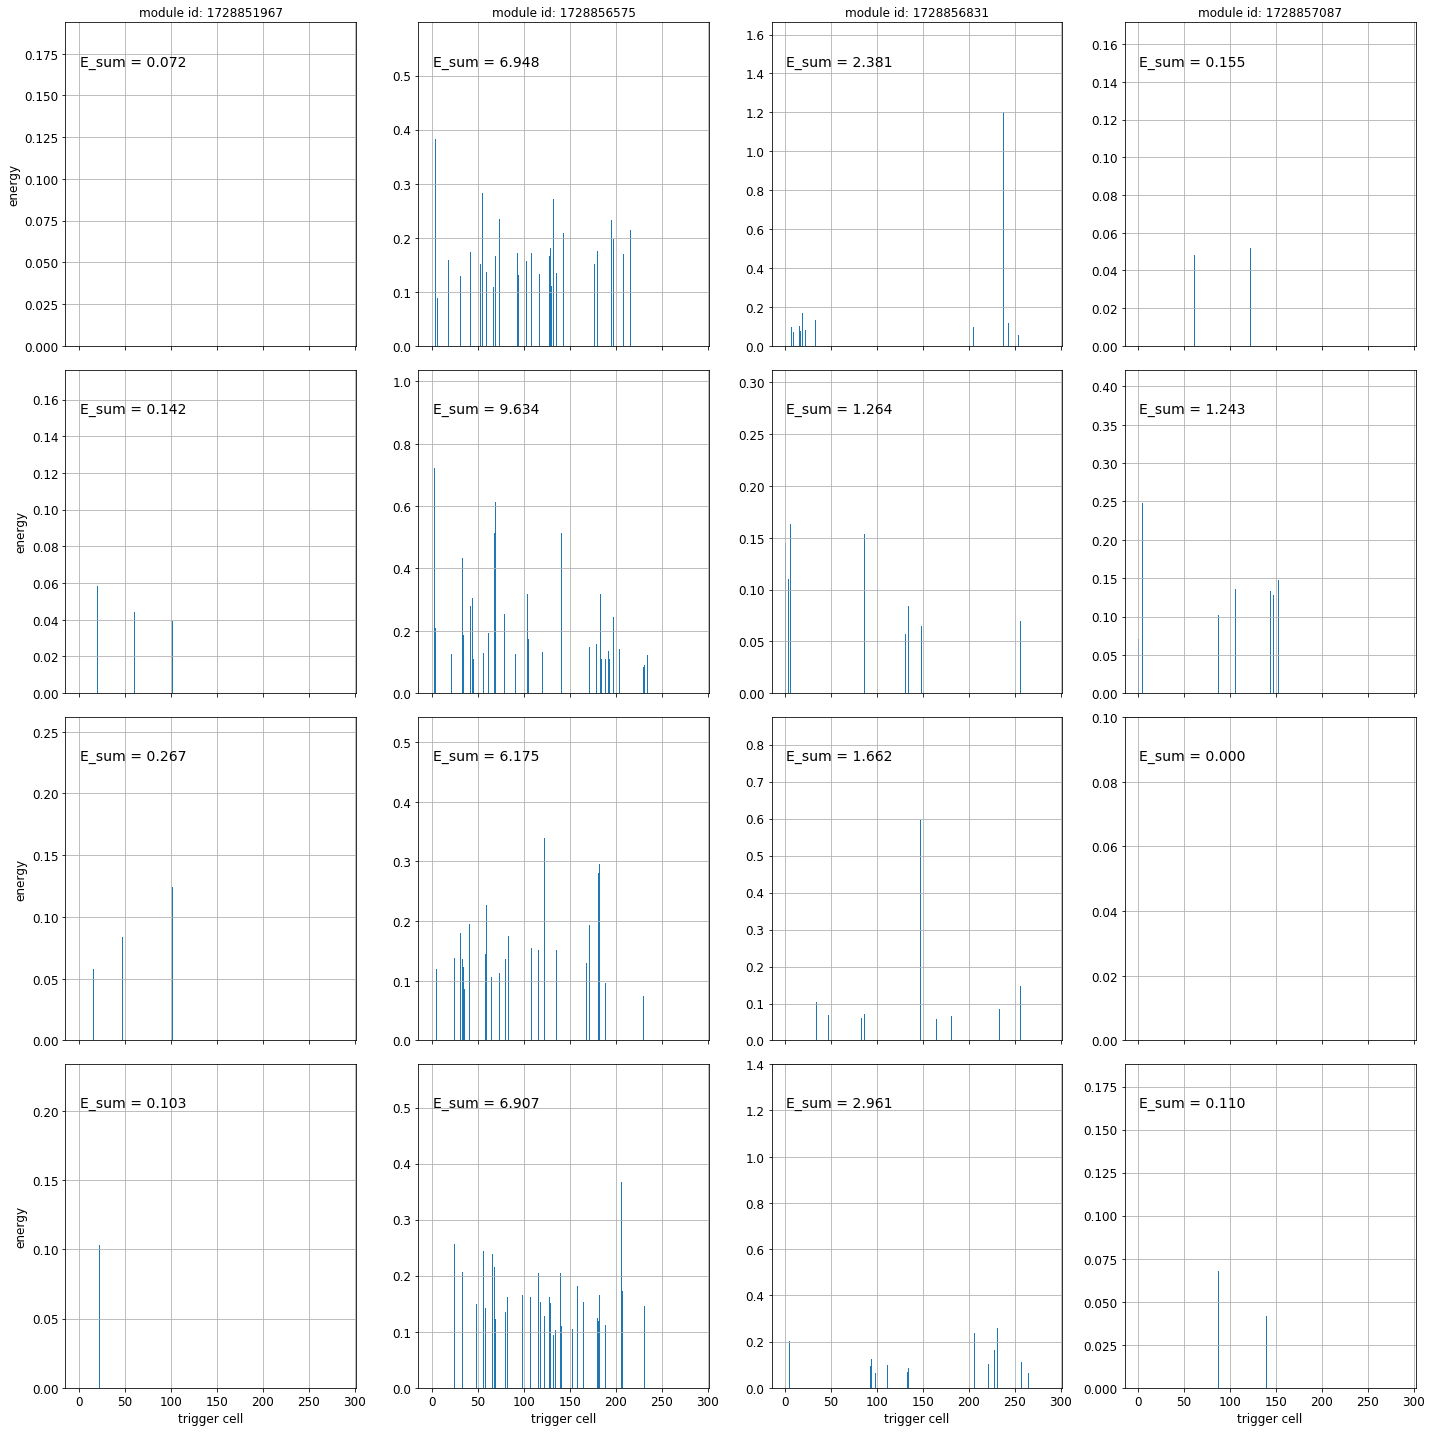

In [138]:
fig, axes = plt.subplots(4, 4, figsize=(20,20), facecolor='white', sharex=True, tight_layout=True)

for i, event in enumerate(df.index.levels[0].values):
    if event > 5004: break
        
    data = df.loc[event]
    for j, mod_id in enumerate(data.index.levels[0].values):
        energy = data.loc[mod_id].tc_energy.values
        axes[i][j].bar(range(energy.size), energy)
        axes[i][j].text(0.05, 0.9, f'E_sum = {energy.sum():.3f}', transform=axes[i][j].transAxes, fontsize=14, verticalalignment='top')
        axes[i][j].set_ylim(0., 0.1 + 1.3*energy.max())
        
        if i == 0:
            axes[i][j].set_title(f'module id: {mod_id}')
        if i == 3:
            axes[i][j].set_xlabel('trigger cell')
        if j == 0:
            axes[i][j].set_ylabel('energy')
            
        if j > 4: continue
        

plt.show()